## NLP 시스템을 위한 디자인 패턴
---
제품 수준의 NLP 시스템은 복잡할 수 있습니다. NLP 시스템은 문제를 푸는 수단이라는 점을 떠올리면서 구축해야 합니다. 이 장에서는 NLP 시스템의 설계와 배포 패턴을 몇 가지 소개합니다. 기술, 비즈니스, 전략, 운영 목표에 맞는 제품을 개발하려면 팀에서 선택해야 하는 사항 혹은 trade-off입니다.  
6가지 측면에서 설계 고려 사항을 알아보겠습니다.

### <온라인 시스템 vs 오프라인 시스템>  
온라인 시스템에서는 모델 예측이 거의 실시간으로 이루어져야 합니다. 스팸필터나 콘텐츠 관리 등에는 작업 특성상 온라인 시스템이 필요합니다. 반면 오프라인 시스템은 실시간으로 실행될 필요가 없습니다. 입력 배치를 동시에 효과적으로 처리하도록 시스템을 구축하고 ***변환학습(transductive learning)*** 과 같은 기법을 활용할 수 있습니다. 일부 온라인 시스템은 실시간으로 반응하거나 온라인 방식으로 학습(***online learning***)할 수 있습니다.  
하지만 많은 온라인 시스템은 제품에 투여할 모델을 오프라인에서 주기적으로 만들고 배포하여 구성됩니다. 온라인 학습을 사용해 구축된 시스템은 적대적인 환경에 민감해야 합니다. 이와 관련한 사례는 마이크로소프트의 트위터 챗봇 '테이'입니다. 테이는 방향을 잃고 부적절한 대화를 학습했으며 공격적인 트윗으로 응답하기 시작했습니다. 소 잃고 외양간 고치는 격이지만 마이크로소프트는 론칭한 지 하루도 되지 않아 서비스를 중지했습니다.  


graphic.svg

일반적으로는 먼저 오프라인 시스템을 만들고 이를 온라인 시스템으로 만드는 순서로 시스템을 구축합니다. 여기에는 엔지니어링 노력이 많이 들어가는데요 그다음 피드백 루프(feedback loop)와 때에 따라 학습 기법을 교체하여 온라인 학습 시스템으로 만듭니다. 이런 순서는 코드 베이스에 추가되는 복잡도 측면에서 어쩔 수 없지만 적대 샘플을 다뤄야 하는 등 사각지대를 만날 수 있습니다.

### <상호작용 시스템 vs 비상호작용 시스템>  
자연어 시스템은 대부분 상호작용이 없습니다. 모델이 독자적으로 예측을 만들기 때문입니다. 사실 많은 제품 수준의 NLP 모델이 ETL(Extract, Transform, Load) 데이터 처리 파이프라인의 변환 단계에 깊게 내장되었습니다. 어떤 상황에서는 예측을 만드는 과정에 사람이 개입하면 도움이 될 수 있습니다. 


밑에 보이는 그림은 상호작용이 있는 Lilt Inc.의 기계 번역 인터페이스의 예입니다. '소위 혼합 주도 모델'(mixed-initiative model)로서 모델과 사람이 예측을 만드는 데 함께 관여합니다. 상호작용 시스템은 구성하기 어렵지만 피드백 루프에 사람을 참여시킴으로써 높은 정확도를 달성할 수 있습니다.


## <유니모달 시스템 vs 멀티모달 시스템>  

학습과 예측 과정에 모드를 하나 이상 포함하면 도움이 될 때가 많습니다. 예를들어 새로운 자막 시스템에 오디오 스트림뿐만 아니라 비디오 프레임도 입력으로 사용하면 유용합니다. 구글의 최근 연구인 'Looking to Listen'은 까다로운 화자 분리(speaker source separation) 문제를 해결하려고 여러 종류의 입력을 사용합니다. 멀티모달 시스템(multimodal system)은 구축과 배포에 비용이 많이 들지만 입력을 하나 이상 연결하여 복잡한 문제에서 유니모달(unimodal)에서는 얻을 수 없는 신호를 제공합니다.  
NLP에서도 이런 예를 볼 수 있습니다. 예를 들어 멀티모달 번역에서는 여러 소스 언어를 입력받아 번역 품질을 향상할 수 있습니다. 웹 페이지의 주제를 선정(토픽 모델링)할 때 밑의 그림처럼 페이지에 포함된 텍스트와 이미지에서 추출한 특성을 활용할 수 있습니다.

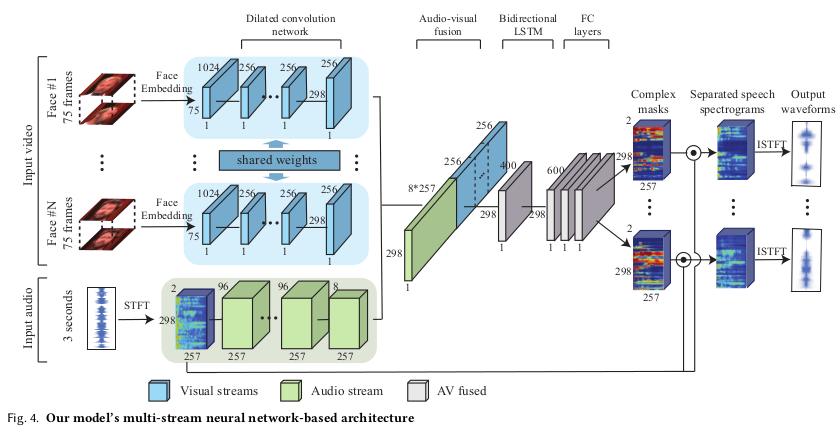

### <엔드 투 엔드 시스템 vs 분할 시스템>  
딥러닝이 등장한 이후 연구자와 엔지니어에게 또 다른 선택 사항이 생겼습니다. 여러 구성 요소로 이루어진 파이프라인 또는 하나로 구성된 엔드 투 엔드 시스템으로 NLP 시스템을 만들 수 있습니다. 기계 번역, 요약, 음성 인식과 같은 많은 분야에서 엔드 투 엔드 설계를 선호합니다. 잘 설계된 엔드 투 엔드 시스템은 구현과 배포의 복잡도를 낮추고 코드 라인 수를 크게 줄입니다.  
분할(piecewise) 시스템은 복잡한 NLP 작업을 부분 작업으로 쪼개어 최종 작업 목적과 관계없이 개별적으로 최적화합니다. 분할 시스템의 부분 작업 덕분에 모듈화할 수 있고 제품의 특정 이슈를 수정하기 쉽지만, 보통 기술 부채(technical dept)가 약간 발생합니다.


## <폐쇄형 도메인 시스템 vs 개방형 도메인 시스템>  

페쇄형 도메인 시스템(closed-domain system)은 해당 도메인에서 잘 동작하도록 최적화됩니다. 예를 들어 어떤 기계 번역 시스템은 생의학 저널에 잘 맞도록 최적화될 수 있습니다. 이는 생의학 말뭉치에서 훈련하는 것 이상의 작업을 포함합니다.  
반면 개방형 도메인 시스템(open-domain system)은 범용적인 목적으로 사용합니다.(구글 번역 같은) 또 다른 예로 문서 레이블링 시스템을 생각해 볼까요? 일반적으로 사전에 정의된 클래스 중 하나만 예측한다면 폐쇄형 도메인 시스템에 속합니다. 하지만 실행 중에 새로운 클래스를 발견하도록 고안되었다면 폐쇄형 도메인 시스템에입니다. 번역과 음성 인식 시스템 입장에서 폐쇄형 도메인 시스템을 '고정 어휘 사전(limited vocabulary) 시스템'이라고도 부릅니다.

## <단일 언어 시스템 vs 다중 언어 시스템>  
한 언어를 다루는 NLP 시스템을 ***단일 언어 시스템(monolingual system)*** 이라 부릅니다. 단일 언어 시스템을 만들고 최적화하기는 쉽습니다.  
반면 ***다중 언어 시스템(multilingual system)*** 은 여러 언어를 다루는 목적으로 구축됩니다. 이런 시스템은 다른 언어의 데이터셋으로 훈련할 때 바로 작동할 것이라 기대할 수 있습니다. 다중 언어 시스템은 매력적이지만, 단일 언어 버전에도 장점이 있습니다.  
연구자와 엔지니어는 해당 언어의 전문가와 많은 자료를 활용해서 고품질 시스템을 만들 수 있습니다. 따라서 일반적인 다중 언어 시스템에서는 달성하기 힘든 결과를 냅니다. 이런 이유로 최적화된 개별 단일 언어 시스템을 묶어 다중 언어 시스템을 구현하기도 합니다. 이 경우 입력이 시스템에 주입될 때 언어를 식별하는 구성 요소가 있습니다.

## 더 배울 것들
---
파이토치 같은 프레임워크와 딥러닝같이 빠르게 변화는 분야에서 일하는 것은 움직이는 땅 위에 집을 짓는 것과 같습니다. 책에서 얻은 지식을 계속 넓혀갈 수 있도록 딥러닝, 파이토치, NLP에 관련된 자료를 제시합니다.  


>*   파이토치 문서(https://pytorch.org/docs)
>*   파이토치 포럼(https://discuss.pytorch.org)

>*   머신러닝(https://arxiv.org/list/cs.LG/recent)
>*   계산과 언어(https://arxiv.org/list/cs.CL/recent)
>*   인공지능(https://arxiv.org/list/cs.AI/recent)

>*   ACL(Association of Computational Linguistics)
>*   EMNLP(Empirical Methods in Natural Language Processing)
>*   NAACL(North American Association for Computational Linguistics)
>*   EACL(European chapter of ACL)
>*   CoNLL(Conference on Computational Natural Language Learning)


이를 포함한 다양한 콘퍼런스와 워크숍, 중요한 NLP 뉴스에 관한 최신 정보를 얻으려면 aclwep.org를 추천합니다.  
기본을 넘어 더 많은 것을 배우려면 연구 논문을 읽게 될지 모릅니다. 논문을 효율적으로 읽는 방법을 알면 도움이 될 것입니다. Jason Eisner의 글(https://www.cs.jhu.edu/~jason/advice/how-to-read-a-paper.html) 에서 NLP 논문을 읽는 유용한 팁을 볼 수 있습니다.

